In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Необходимые библиотеки

In [0]:
import sklearn.tree as tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

# Чтение данных

In [0]:

file_table="/content/drive/My Drive/Диссертация/data/data _Ulitca 17.04.xlsx"
DataListID=4
df=pd.read_excel(file_table,sheet_name=DataListID)
dft=pd.read_excel(file_table,sheet_name=1)


# Использование всех таблиц (необязательно)

In [0]:
df_from_each_file=(pd.read_excel(file_table,sheet_name=i) for i in range(0,10,2))
dfvec=pd.concat(df_from_each_file, ignore_index=True).fillna(0)
df=dfvec

# Подготовка данных

In [11]:
PC_map = {'YES': 1, 'NO': 0}
#df["PC"]=df["PC"].map(PC_map)

dft90=dft.T.copy()
dft90.columns=dft["Reference"]
dft90=dft90.drop(index="Reference")
df

,Name,GPS,SecN,Attr6,Attr8,Attr13,Attr12,Attr4,Attr5,Attr20,Attr14,Attr11,PC,Attr15,Attr7,Attr1,Attr9,Attr18,Attr19,Attr16,Attr17
0,ул. Промышленная,"59.897420, 30.263901",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ул. Промышленная,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ул. Промышленная,0,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,YES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ул. Промышленная,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ул. Промышленная,0,4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,YES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ул. Промышленная,0,5,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,YES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ул. Промышленная,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ул. Промышленная,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ул. Промышленная,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ул. Промышленная,0,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,YES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Проверка данных

In [5]:
dft90

Reference,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20
Name,остановка общественного транспорта,музей,"Торговый центр, метро и др.",зеленая зона (сад),"образовательное учреждение (Д/САД, ШКОЛА, УНИВЕР)",жилое помещение,жилое помещение с размещением социально-значим...,бизнес-центр,"бизнес-центр, офисные помещения, магазины, каф...",Супермаркет,торговый центр,продуктовый (продовольственный) магазин,производственная зона,зоомагазин,"Собор, Церковь",Гостиница,музей,автосалон,"Комплекс, где расположены банк, почта, кафе, к...","столовая, кафе"


In [6]:
df

,Name,GPS,SecN,Attr7,Attr5,Attr1,Attr4,PC
0,Московский пр.,"59.885426, 30.320072",0,1,0,1,0,YES
1,Московский пр.,NaN,1,0,0,0,0,NO
2,Московский пр.,NaN,2,1,0,0,1,YES
3,Московский пр.,NaN,3,0,0,0,0,NO
4,Московский пр.,NaN,4,0,0,0,0,NO
5,Московский пр.,NaN,5,1,1,1,0,YES
6,Московский пр.,NaN,6,0,0,0,0,NO
7,Московский пр.,NaN,7,1,0,1,0,YES
8,Московский пр.,NaN,8,1,0,0,0,YES
9,Московский пр.,NaN,9,0,0,0,0,NO


# Построение дерева решений

In [0]:
attr_cols = [c for c in df if c.startswith('Attr')]
target_names=dft90[attr_cols].iloc[0].values
feature_names=df["PC"].values
X=df[attr_cols]
Y=df["PC"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
attr_cols.append("PC")

# Визуализация дерева решений

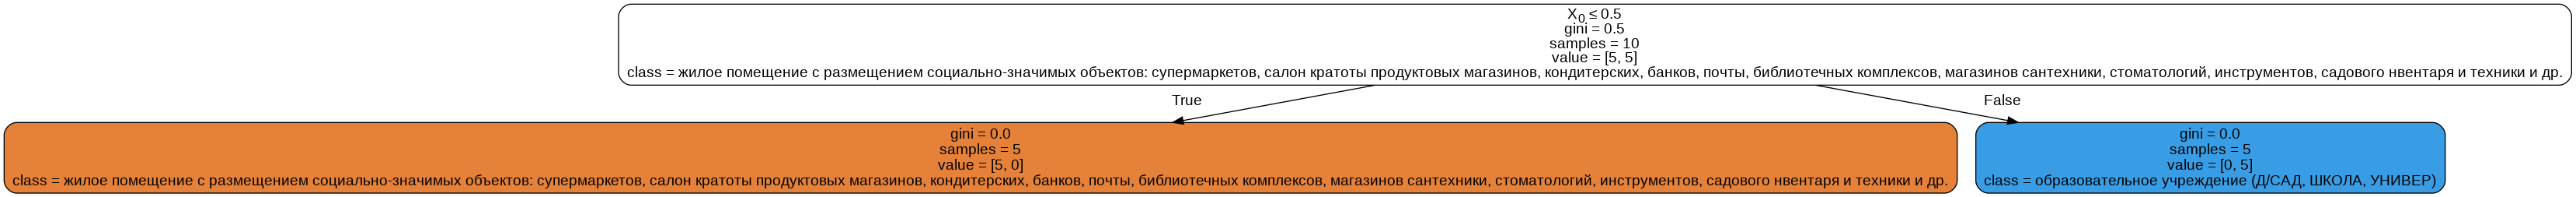

In [18]:
dot_data = StringIO()
tree.export_graphviz(clf,
 out_file=dot_data,
 class_names=target_names, # the target names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Тестирование дерева решений

In [19]:
def TestSec2PC(SecN):
    PC=clf.predict([X.iloc[SecN].values])
    print("Мы тестируем Sec = "+str(SecN)+" и получаем результат: нам нужен пешеходный переход на "+df['Name'].iloc[SecN]+": "+str(PC))

SecN=0
TestSec2PC(SecN)
SecN=9
TestSec2PC(SecN)


Мы тестируем Sec = 0 и получаем результат: нам нужен пешеходный переход на Московский пр.: ['YES']
Мы тестируем Sec = 9 и получаем результат: нам нужен пешеходный переход на Московский пр.: ['NO']


In [27]:
clf.predict([[1,0,0,0]])

array(['YES'], dtype=object)